# Assignment-1
## Team: Aditya Ahuja (2020275), Deeptanshu Barman Chowdhuri (2020293)

##  Imports & Dataset

In [1]:
# !pip install torchmetrics
# !pip install lightning


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\Deeptanshu Barman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ------------------- -------------------- 1.0/2.0 MB 20.5 MB/s eta 0:00:01
     ---------------------------------------  2.0/2.0 MB 31.9 MB/s eta 0:00:01
     ---------------------------------------- 2.0/2.0 MB 25.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/778.1 kB ? eta -:--:--
     ------------------------------------- 778.1/778.1 kB 24.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/365.2 kB ? eta -:--:--
     ------------------------------------- 365.2/365.2 kB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/50.4 kB ? eta -:--:--
     ---------------------------------------- 50.4/50.4 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/76.4 kB ? eta -:--:--
     ---------------------------------------- 76.4/76.4 kB 4.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\Deeptanshu Barman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import torch
import requests
import os
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import random_split
import lightning as L

In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [5]:
Noise_0_data = requests.get(
    "http://AdityaAhuja01.pythonanywhere.com/data/df_syn_train_0_0_.csv"
)
Noise_Low_data = requests.get(
    "http://AdityaAhuja01.pythonanywhere.com/data/df_synA_train_shuffled.csv"
)
Noise_High_data = requests.get(
    "http://AdityaAhuja01.pythonanywhere.com/data/df_synA_test_hard_shuffled_sample.csv"
)

if Noise_0_data.status_code == 200 and Noise_Low_data.status_code == 200 and Noise_High_data.status_code == 200:
    datafolder = "Data/Assignment1"

    if not os.path.exists(datafolder):
        os.makedirs(datafolder)

    with open(os.path.join(datafolder, "data_0_noise"), "wb") as f:
        f.write(Noise_0_data.text.encode("utf-8"))

    with open(os.path.join(datafolder, "data_Low_noise"), "wb") as f:
        f.write(Noise_Low_data.text.encode("utf-8"))

    with open(os.path.join(datafolder, "data_High_noise"), "wb") as f:
        f.write(Noise_High_data.text.encode("utf-8"))
else:
    print("Error in fetching data")

In [4]:
Noise_0_dataframe = pd.read_csv("Data/Assignment1/data_0_noise")
Noise_Low_dataframe = pd.read_csv("Data/Assignment1/data_Low_noise")
Noise_High_dataframe = pd.read_csv("Data/Assignment1/data_High_noise")


In [5]:
class_index = list(Noise_0_dataframe["era"].unique())
print(class_index)
def encode(value, class_index = class_index):
    return class_index.index(value)

Noise_0_dataframe["era"] = Noise_0_dataframe["era"].apply(encode)

[2, 4, 5, 7, 9, 10, 12, 15, 16, 18, 19, 21]


In [37]:
Noise_0_dataframe

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,Open_n-Close_n_changelen_val,SMA_20-SMA_10_changelen_val,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val
0,0.50,0.50,0.50,0.50,0.0,0.50,0.25,1.0,1.0,0.5,...,0.50,0.75,0.25,0.75,0.50,75,537,0,0.75,0.75
1,0.50,0.50,0.50,0.50,0.0,0.50,0.50,1.0,1.0,0.5,...,0.50,0.50,0.75,0.50,0.50,76,537,0,0.75,0.75
2,0.50,0.50,0.50,0.50,0.0,0.50,0.50,1.0,1.0,0.5,...,0.50,0.25,0.50,0.50,0.75,77,537,0,0.75,0.75
3,0.50,0.50,0.50,0.50,0.0,0.50,0.50,1.0,1.0,0.5,...,0.25,0.25,0.50,0.75,0.50,78,537,0,0.75,0.75
4,0.50,0.50,0.50,0.50,0.0,0.50,0.50,1.0,1.0,0.5,...,0.75,0.25,0.50,0.50,0.50,79,537,0,0.75,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,0.25,0.25,0.25,0.25,0.0,0.25,0.25,0.0,1.0,0.5,...,0.75,0.75,0.50,0.50,0.50,135,555,11,0.25,0.25
7796,0.25,0.25,0.25,0.25,0.0,0.25,0.25,0.0,1.0,0.5,...,0.75,0.50,0.50,0.75,0.75,136,555,11,0.25,0.25
7797,0.25,0.25,0.25,0.25,0.0,0.25,0.25,0.0,1.0,0.5,...,0.75,0.50,0.50,0.50,0.50,137,555,11,0.25,0.25
7798,0.25,0.25,0.25,0.25,0.0,0.25,0.25,0.0,1.0,0.5,...,0.50,0.50,0.75,0.50,0.50,138,555,11,0.25,0.25


## Setting up Dataset & Dataloaders

In [6]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, noise, transform=None, target_transform=None,drop = None):
        self.dataframe = dataframe
        if drop != None:
            self.X = dataframe.drop(drop, axis=1).values
        else:
            self.X = dataframe.values
        self.y = dataframe["era"].values
        self.transform = transform
        self.target_transform = target_transform
        self.noise = noise

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        item, label = self.X[idx], self.y[idx]
        return item, label

    def get_noise(self):
        return self.noise


In [7]:
#Setting up datasets
Noise_0_dataset = CustomDataset(Noise_0_dataframe, "0",drop = ["row_num","day","era","target_10_val","target_5_val"])
# Noise_Low_dataset = CustomDataset(Noise_Low_dataframe, "Low", drop = ["row_num","day","era","target_10_val","target_5_val"])
# Noise_High_dataset = CustomDataset(Noise_High_dataframe, "High", drop = ["row_num","day","era","target_10_val","target_5_val"])
Noise_0_train, Noise_0_test = random_split(Noise_0_dataset, [int(0.8 * len(Noise_0_dataset)), len(Noise_0_dataset) - int(0.8 * len(Noise_0_dataset))])
# Noise_Low_train, Noise_Low_test = random_split(Noise_Low_dataset, [int(0.8 * len(Noise_Low_dataset)), len(Noise_Low_dataset) - int(0.8 * len(Noise_Low_dataset))])
# Noise_High_train, Noise_High_test = random_split(Noise_High_dataset, [int(0.8 * len(Noise_High_dataset)), len(Noise_High_dataset) - int(0.8 * len(Noise_High_dataset))])

In [8]:
#Setting up dataloaders
Noise_0_train_loader = DataLoader(Noise_0_train, batch_size=64, shuffle=True)
Noise_0_test_loader = DataLoader(Noise_0_test, batch_size=64, shuffle=True)
# Noise_Low_train_loader = DataLoader(Noise_Low_train, batch_size=64, shuffle=True)
# Noise_Low_test_loader = DataLoader(Noise_Low_test, batch_size=64, shuffle=True)
# Noise_High_train_loader = DataLoader(Noise_High_train, batch_size=64, shuffle=True)
# Noise_High_test_loader = DataLoader(Noise_High_test, batch_size=64, shuffle=True)

In [9]:
Noise_0_dataframe.head()

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,Open_n-Close_n_changelen_val,SMA_20-SMA_10_changelen_val,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val
0,0.5,0.5,0.5,0.5,0.0,0.5,0.25,1.0,1.0,0.5,...,0.50,0.75,0.25,0.75,0.50,75,537,0,0.75,0.75
1,0.5,0.5,0.5,0.5,0.0,0.5,0.50,1.0,1.0,0.5,...,0.50,0.50,0.75,0.50,0.50,76,537,0,0.75,0.75
2,0.5,0.5,0.5,0.5,0.0,0.5,0.50,1.0,1.0,0.5,...,0.50,0.25,0.50,0.50,0.75,77,537,0,0.75,0.75
3,0.5,0.5,0.5,0.5,0.0,0.5,0.50,1.0,1.0,0.5,...,0.25,0.25,0.50,0.75,0.50,78,537,0,0.75,0.75
4,0.5,0.5,0.5,0.5,0.0,0.5,0.50,1.0,1.0,0.5,...,0.75,0.25,0.50,0.50,0.50,79,537,0,0.75,0.75


## Model

In [10]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [18]:
device

'cuda'

In [11]:
class MyMLP(torch.nn.Module):
    def __init__ (self, modules):
        super().__init__()
        self.relu = torch.nn.ReLU()
        MyModuleList = torch.nn.ModuleList([m for m in modules])
        self.layers = torch.nn.Sequential(*MyModuleList)
        self.softmax = torch.nn.Softmax(dim = 1)


    def forward(self, X: torch.Tensor):
        if (X.shape[1] != 24):
            raise ValueError("Input shape must be (batch_size, 24)")
        X = X.to(device)
        X = self.layers(X)
        X = self.softmax(X)

        return X



In [46]:
Model = MyMLP([torch.nn.Linear(24,64),torch.nn.ReLU(),torch.nn.Linear(64,128),torch.nn.ReLU(),torch.nn.Linear(128,64),torch.nn.ReLU(),torch.nn.Linear(64,12)])
Model = Model.to(device)

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10,verbose=True):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device).to(torch.float32), labels.to(device).to(torch.long)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_train_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device).to(torch.float32), labels.to(device).to(torch.long)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss = running_val_loss / len(val_loader)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train')
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()


Epoch [1/4000], Train Loss: 2.4820, Train Acc: 0.1287, Val Loss: 2.4647, Val Acc: 0.1987
Epoch [2/4000], Train Loss: 2.3376, Train Acc: 0.2769, Val Loss: 2.2524, Val Acc: 0.3314
Epoch [3/4000], Train Loss: 2.1926, Train Acc: 0.4575, Val Loss: 2.1189, Val Acc: 0.5468
Epoch [4/4000], Train Loss: 2.0728, Train Acc: 0.5838, Val Loss: 2.0497, Val Acc: 0.6071
Epoch [5/4000], Train Loss: 2.0145, Train Acc: 0.6369, Val Loss: 1.9872, Val Acc: 0.6776
Epoch [6/4000], Train Loss: 1.9737, Train Acc: 0.6800, Val Loss: 1.9639, Val Acc: 0.6974
Epoch [7/4000], Train Loss: 1.9516, Train Acc: 0.7032, Val Loss: 1.9436, Val Acc: 0.7077
Epoch [8/4000], Train Loss: 1.9321, Train Acc: 0.7216, Val Loss: 1.9235, Val Acc: 0.7327
Epoch [9/4000], Train Loss: 1.9177, Train Acc: 0.7401, Val Loss: 1.9052, Val Acc: 0.7609
Epoch [10/4000], Train Loss: 1.9073, Train Acc: 0.7420, Val Loss: 1.8964, Val Acc: 0.7513
Epoch [11/4000], Train Loss: 1.8969, Train Acc: 0.7551, Val Loss: 1.8966, Val Acc: 0.7487
Epoch [12/4000], Tr

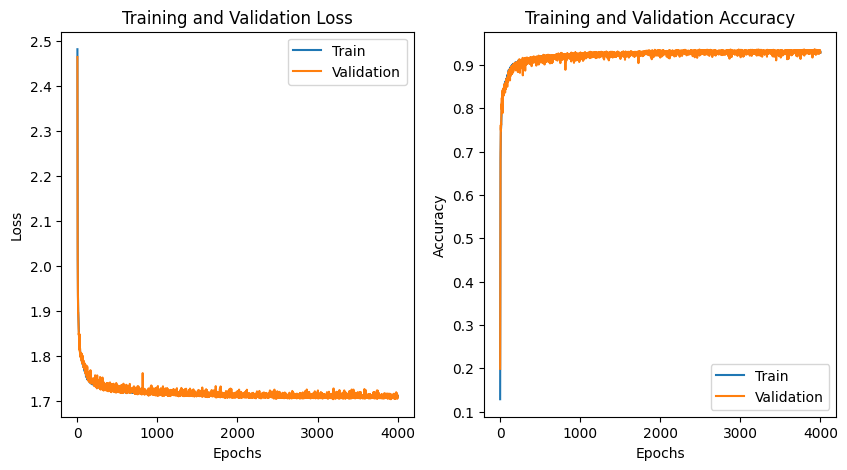

In [47]:
optim = optim.Adam(Model.parameters(), lr=0.001, weight_decay=0.001)
train_model(Model,torch.nn.CrossEntropyLoss(), optim,Noise_0_train_loader, Noise_0_test_loader,num_epochs=4000)

In [48]:
PATH = "model.pt"

# Save the model
torch.save(Model.state_dict(), PATH)

In [49]:
PATH = "model.pt"

# Load the model
Model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

## Lightning

In [20]:
from lightning.pytorch.utilities.types import OptimizerLRScheduler


class LightningMLP(L.LightningModule):
    def __init__(self, model, loss, optimizer):
        super().__init__()
        self.model = model
        self.loss = loss
        self.optimizer = optimizer

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        inputs, targets = torch.tensor(inputs).to(torch.float32),torch.tensor(targets).to(torch.long)
        inputs, targets = inputs.to(device),targets.to(device)
        output = self.model(inputs)
        loss = self.loss(output, targets)
        self.log("train_loss", loss)
        return loss

    def test_step(self,batch,batch_idx):
        inputs, targets = batch
        inputs, targets = torch.tensor(inputs).to(torch.float32),torch.tensor(targets).to(torch.long)
        inputs, targets = inputs.to(device),targets.to(device)
        output = self.model(inputs)
        loss = self.loss(output, targets)
        self.log("train_loss", loss)
        return loss


    def configure_optimizers(self):
        return self.optimizer


In [40]:
mymodel = LightningMLP(Model, torch.nn.CrossEntropyLoss, torch.optim.Adam(Model.parameters(), lr=0.001))
trainer = L.Trainer(max_epochs = 10)
trainer.fit(mymodel, Noise_0_train_loader, Noise_0_test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


C:\Users\Deeptanshu Barman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightning\pytorch\trainer\configuration_validator.py:72: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type  | Params
--------------------------------
0 | model | MyMLP | 6.5 K 
--------------------------------
6.5 K     Trainable params
0         Non-trainable params
6.5 K     Total params
0.026     Total estimated model params size (MB)
C:\Users\Deeptanshu Barman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

C:\temp\ipykernel_16032\3998816417.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, targets = torch.tensor(inputs).to(torch.float32),torch.tensor(targets).to(torch.long)


RuntimeError: Boolean value of Tensor with more than one value is ambiguous